# Importing Libraries and data


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [48]:
df_train = pd.read_csv("data_set.csv")

C:\Users\natee\AppData\Local\Temp\ipykernel_194180\2313729197.py:1: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



# Recognizing Data set

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [50]:
# Check NA
df_train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [51]:
# Select Columns
cols= ['Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']

needed_data = df_train[cols]

In [52]:
# We will drop the monthly_Inhand_Salary because it is highly correlated with Annual income and it has a lot of missing values. We can alternatively use the Anuual_Salary column to fill the missing values for monthly_salary and use the monthly_salary column for analysis. 
needed_data = needed_data.drop(['Monthly_Inhand_Salary'], axis = 1) 
needed_data.isnull().sum()  

Age                            0
Annual_Income                  0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [53]:
# convert the column ['Monthly_Balance'] to string datatype to limit the number of characters in string because some of the the columns have enteries which exceed the limit of float datatype
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].astype(str)
# use this column to restrict the characters to first 10 characters.
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].str[:10]
needed_data['Monthly_Balance']

0        312.494088
1        284.629162
2        331.209862
3        223.451309
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164978
99999    393.673695
Name: Monthly_Balance, Length: 100000, dtype: object

In [54]:
needed_data.dtypes

Age                          object
Annual_Income                object
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

# Handling missing data

In [55]:
# Convert few columns from Object to Int or Float Data Type so that we can perform analysis on the data. 

# Annual income column has a lot of unclean data with '_' at the end or starting of the string. We will replace them with space. 
needed_data['Annual_Income'] = needed_data['Annual_Income'].apply(lambda x: str(x).replace("_"," "))  
# Num_of_Delayed_Payment column has None, nan for null values. WE can replace them with '0'.
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("None","0")) 
# Num_of_Delayed_Payment column has a lot of unclean data with '_' at the end or starting of the string. We will replace them with space. 
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("_"," "))    
# Similarly we can clean data for other columns.  
needed_data['Num_of_Delayed_Payment'] = needed_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("nan","0")) 
# We will use the to_numeric() function to convert the values from strng to integer.
needed_data['Num_of_Delayed_Payment'] = pd.to_numeric(needed_data['Num_of_Delayed_Payment'])
needed_data['Outstanding_Debt'] = needed_data['Outstanding_Debt'].apply(lambda x: str(x).replace("_"," ")) 
needed_data['Outstanding_Debt'] = pd.to_numeric(needed_data['Outstanding_Debt'])                                           
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("_"," "))
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("nan","0"))
needed_data['Amount_invested_monthly'] = needed_data['Amount_invested_monthly'].apply(lambda x: str(x).replace("None","0"))
needed_data['Amount_invested_monthly'] = pd.to_numeric(needed_data['Amount_invested_monthly'])
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("_"," "))
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("None","0"))
needed_data['Monthly_Balance'] = needed_data['Monthly_Balance'].apply(lambda x: str(x).replace("nan","0"))
needed_data['Monthly_Balance'] = pd.to_numeric(needed_data['Monthly_Balance'])
needed_data['Annual_Income'] = pd.to_numeric(needed_data['Annual_Income'])
needed_data['Age'] = needed_data['Age'].apply(lambda x: str(x).replace("_"," "))
needed_data['Age'] = pd.to_numeric(needed_data['Age'])
needed_data['Num_of_Loan'] = needed_data['Num_of_Loan'].apply(lambda x: str(x).replace("_"," "))
needed_data['Num_of_Loan'] = pd.to_numeric(needed_data['Num_of_Loan'])

In [56]:
needed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Annual_Income             100000 non-null  float64
 2   Interest_Rate             100000 non-null  int64  
 3   Num_of_Loan               100000 non-null  int64  
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    100000 non-null  int64  
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Amount_invested_monthly   100000 non-null  fl

In [57]:
# view the data to figure out the further analysis. 
needed_data.describe(include = 'all')  

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,98035.000000,100000,100000.000000,100000.000000,90970,100000,100000.000000,100000.000000,100000,1.000000e+05,100000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,404,3,NaN,NaN,7,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,15 Years and 11 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36479,NaN,NaN,446,52326,NaN,NaN,25513,NaN,53174
mean,110.649700,1.764157e+05,72.466040,3.009960,21.068780,28.758090,27.754251,NaN,1426.220376,32.285173,NaN,NaN,1403.118217,608.863270,NaN,9.768444e+01,NaN
std,686.244717,1.429618e+06,466.422621,62.647879,14.860104,218.117625,193.177339,NaN,1155.129026,5.116875,NaN,NaN,8306.041270,2001.382002,NaN,3.162603e+04,NaN
min,-500.000000,7.005930e+03,1.000000,-100.000000,-5.000000,-3.000000,0.000000,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,-3.333333e+06,NaN
25%,24.000000,1.945750e+04,8.000000,1.000000,10.000000,8.000000,3.000000,NaN,566.072500,28.052567,NaN,NaN,30.306660,67.431711,NaN,2.678714e+02,NaN
50%,33.000000,3.757861e+04,13.000000,3.000000,18.000000,13.000000,6.000000,NaN,1166.155000,32.305784,NaN,NaN,69.249473,128.698239,NaN,3.348066e+02,NaN
75%,42.000000,7.279092e+04,20.000000,5.000000,28.000000,18.000000,9.000000,NaN,1945.962500,36.496663,NaN,NaN,161.224249,255.038698,NaN,4.676706e+02,NaN


In [58]:
# For the Credit_History_Age column we will need to find a way to convert the values into integer or float.
# We can either remove the repeating parts of the string such as 'Years and Months' or we can grab the first two characters from left of the string for Year and the and 2 characters from 7th position right end. Or we can use both for easier way. 
# I will use the second option. 

nd= needed_data.copy()
# We will fill the missing string values with 0 so we can convert to integer type later on.
nd['Credit_History_Age'] = nd['Credit_History_Age'].replace('nan', np.nan).fillna(0)   
# To convert to string type. 
nd['Credit_History_Age'] = nd['Credit_History_Age'].astype(str)                       
# To grab the first two characters of the string.
nd['History_Year'] = nd['Credit_History_Age'].str[ :2]                              
# We will use the negative values to count the numbers from the right side of the data. 
nd['History_Month'] = nd['Credit_History_Age'].str[ -9:-7]                            

In [59]:
 # We use the pd.to_numeric to convert the column into integer type.
nd['History_Year'] = pd.to_numeric(nd['History_Year'])                 
# Now that we have months and years we can make a combined columns with total months for Credit_History_Age.
nd['History_Month'] = pd.to_numeric(nd['History_Month']) 
nd['Credit_History_Age'] = nd['History_Year']*12 + nd['History_Month']  
# Now that we have a consolidated column for Credit_History_Age we can drop the History_Year and History_month columns.
nd = nd.drop(['History_Year'], axis = 1)                                
nd = nd.drop(['History_Month'], axis = 1)
nd

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,3,4,3,7,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494088,Good
1,23,19114.12,3,4,-1,0,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,19114.12,3,4,3,7,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209862,Good
3,23,19114.12,3,4,5,4,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.12,3,4,6,0,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,7,2,23,7,3.0,_,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25,39628.99,7,2,18,7,3.0,_,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,25,39628.99,5729,2,27,6,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25,39628.99,7,2,20,0,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164978,Standard


# Encoding the data

In [60]:
# Now we have 4 columns left as objects that have categorical or ordinal data. 
# We use this code to view diffferent inputs in each of the coategorical column. 
{column: list(nd[column].unique()) for column in nd.select_dtypes('object').columns}

{'Credit_Mix': ['_', 'Good', 'Standard', 'Bad'],
 'Payment_of_Min_Amount': ['No', 'NM', 'Yes'],
 'Payment_Behaviour': ['High_spent_Small_value_payments',
  'Low_spent_Large_value_payments',
  'Low_spent_Medium_value_payments',
  'Low_spent_Small_value_payments',
  'High_spent_Medium_value_payments',
  '!@9#%8',
  'High_spent_Large_value_payments'],
 'Credit_Score': ['Good', 'Standard', 'Poor']}

In [61]:
# First we will identify which columns are nominal and which ones are ordinal.
# Credit_Mix and Credit_score are ordinal.So we can provide order to them manually. 
# Payment_of_Min_Amount, Payment_Behaviour can be considered as catecorical and we can use onehotencoder to provide dummy variables.

# After seeing the different values in the columns we find out that some cells of column '[Payment_Behaviour]' have '!@9#%8' as a conditional values  We will delete all the observations with _ as value.
nd = nd[nd.Payment_Behaviour != '!@9#%8']
# Similarly some of the cells in ['Payment_of_Min_Amount'] column are listed as 'NM'.                                  
nd = nd[nd.Payment_of_Min_Amount != 'NM']   

In [62]:
# We will now define functions for one hot encoding and ordinal encoding. So We will create 2 functions which we can call later for ordinal or categorical data. We will use onehot encoding for categorical data and ordinal encoding for Ordinal. 

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [63]:
# We will create new array to define the order of the ordinal variables so that we can use the order in the ordinal encoder() function. We will do this for all three ordinal columns i.e.: 'Credit_Mix', 'Credit_Score', 'Payment_Behaviour'.

Credit_Mix_order = [ '_',
                    'Bad',
                    'Standard',
                    'Good']

Payment_Behaviour_order = ['Low_spent_Small_value_payments',
                          'Low_spent_Medium_value_payments',
                          'High_spent_Small_value_payments',
                          'Low_spent_Large_value_payments',
                           'High_spent_Medium_value_payments',
                           'High_spent_Large_value_payments']

Credit_Score_order = ['Poor',
                      'Standard',
                      'Good' ]

In [64]:
# We will call the ordical_encode() function for encoding different columns. Three inputs are the name of dataset, name of column and the order array. 
nd = ordinal_encode(nd, 'Credit_Mix', ordering = Credit_Mix_order)                     
nd = ordinal_encode(nd, 'Payment_Behaviour', ordering = Payment_Behaviour_order )
nd = ordinal_encode(nd, 'Credit_Score', ordering = Credit_Score_order )

# Payment_of_Min_Amount is a categorical variable so we use onehot encoding for this.
nd = onehot_encode(nd, 'Payment_of_Min_Amount', prefix = 'PMA' )                         
                                  
cleaned_data = nd
# We will now visualize the cleaned table and name it as cleaned_data. 
cleaned_data

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_No,PMA_Yes
0,23,19114.12,3,4,3,7,4.0,0,809.98,26.822620,265.0,49.574949,80.415295,2,312.494088,2,1,0
1,23,19114.12,3,4,-1,0,4.0,3,809.98,31.944960,NaN,49.574949,118.280222,3,284.629162,2,1,0
2,-500,19114.12,3,4,3,7,4.0,3,809.98,28.609352,267.0,49.574949,81.699521,1,331.209862,2,1,0
3,23,19114.12,3,4,5,4,4.0,3,809.98,31.377862,268.0,49.574949,199.458074,0,223.451309,2,1,0
4,23,19114.12,3,4,6,0,4.0,3,809.98,24.797347,269.0,49.574949,41.420153,4,341.489231,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,7,2,20,6,3.0,0,502.38,39.323569,377.0,35.104023,140.581403,4,410.256157,0,1,0
99995,25,39628.99,7,2,23,7,3.0,0,502.38,34.663572,378.0,35.104023,60.971333,5,479.866228,0,1,0
99996,25,39628.99,7,2,18,7,3.0,0,502.38,40.565631,379.0,35.104023,54.185950,4,496.651610,0,1,0
99997,25,39628.99,5729,2,27,6,3.0,3,502.38,41.255522,380.0,35.104023,24.028477,5,516.809083,0,1,0


# Reducing Skewness & Outlier

In [65]:
# 1.We can see that the Age column has outliers with max age being 8698 and minimum being -500, these can be typing errors while inputting the data. We can solve the prblem by taking positive 2 digits of the data if they are typing errors with misplaced decimal and wrong sign or by deleting all the outliers.
# 2.Similarly Interest_rate column has outliers which we will delete due to lack of information.
# 3.Delay_from_due_date column seems to be right except for some negative values. We will remove the sign of the values in this column.
# 4.Num_of_Delayed_Payment also has some negative values. We will remove the sign of the values in this column.
# 5.Num_of_Loan also seems to have negative values and outliers.

In [66]:
q = cleaned_data['Interest_Rate'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Interest_Rate']<q]

cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].apply(lambda x: str(x).replace("-","0"))
cleaned_data['Num_of_Loan'] = cleaned_data['Num_of_Loan'].str[ :1] 
cleaned_data['Num_of_Loan'] = pd.to_numeric(cleaned_data['Num_of_Loan'])  

cleaned_data['Age'] = cleaned_data['Age'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Age'] = cleaned_data['Age'].str[ :3]   
cleaned_data['Age'] = pd.to_numeric(cleaned_data['Age'])  
cleaned_data = cleaned_data[(cleaned_data["Age"]> 18)]
cleaned_data = cleaned_data[(cleaned_data["Age"]< 100)]

cleaned_data['Delay_from_due_date'] = cleaned_data['Delay_from_due_date'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Delay_from_due_date'] = pd.to_numeric(cleaned_data['Delay_from_due_date'])  

cleaned_data['Num_of_Delayed_Payment'] = cleaned_data['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("-"," "))
cleaned_data['Num_of_Delayed_Payment'] = pd.to_numeric(cleaned_data['Num_of_Delayed_Payment'])  

q = cleaned_data['Num_of_Delayed_Payment'].quantile(0.95)
cleaned_data = cleaned_data[cleaned_data['Num_of_Delayed_Payment']<q]
cleaned_data = cleaned_data.fillna('0')

cleaned_data.describe()

C:\Users\natee\AppData\Local\Temp\ipykernel_194180\1183107344.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\natee\AppData\Local\Temp\ipykernel_194180\1183107344.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\natee\AppData\Local\Temp\ipykernel_194180\1183107344.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,PMA_No,PMA_Yes
count,64523.000000,6.452300e+04,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,64523.000000,6.452300e+04,64523.000000,64523.000000,64523.000000
mean,35.326860,1.818940e+05,12.774995,3.028377,18.890566,11.290238,1.752367,1230.955283,32.400487,1399.369993,623.316297,2.279280,1.050576e+02,0.959177,0.477148,0.522852
std,10.088472,1.442609e+06,7.635509,2.329732,13.543497,6.402964,1.078470,1033.089785,5.139010,8269.971865,2015.564061,1.849048,3.214733e+04,0.667875,0.499481,0.499481
min,19.000000,7.006035e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,-3.333333e+06,0.000000,0.000000,0.000000
25%,27.000000,2.035543e+04,7.000000,1.000000,9.000000,7.000000,1.000000,495.740000,28.152948,26.947512,69.783963,0.000000,2.755742e+02,1.000000,0.000000,0.000000
50%,35.000000,3.909434e+04,11.000000,3.000000,16.000000,12.000000,2.000000,1016.370000,32.420808,65.089732,133.297123,2.000000,3.483578e+02,1.000000,0.000000,1.000000
75%,43.000000,7.813942e+04,18.000000,4.000000,26.000000,17.000000,3.000000,1472.320000,36.623414,152.439137,268.283225,4.000000,4.949873e+02,1.000000,1.000000,1.000000
max,95.000000,2.419806e+07,31.000000,9.000000,67.000000,22.000000,3.000000,4998.070000,50.000000,82256.000000,10000.000000,5.000000,1.602041e+03,2.000000,1.000000,1.000000


# Splitting the dataset

In [67]:
X = cleaned_data.drop(('Credit_Score'), axis=1).copy()
cor=[]
col_get=[]
for col in list(X.columns):
    try:
        print(col,cleaned_data['Credit_Score'].corr(cleaned_data[col]))
        col_get.append(col)
        cor.append(abs(cleaned_data['Credit_Score'].corr(cleaned_data[col])))
    except:
        pass
    
data = {'col':col_get, 'correlation': cor}
df_cor=pd.DataFrame.from_dict(data)
df_cor=df_cor.sort_values(by='correlation', ascending=False)
top=10

select=df_cor["col"].head(top).tolist()
df_cor.head(top)
select=list(select)
df_cor.head(top)


Age 0.11258476600456525
Annual_Income 0.0037513701883307242
Interest_Rate -0.45212842445436396
Num_of_Loan -0.30742047421608537
Delay_from_due_date -0.41210256387830724
Num_of_Delayed_Payment -0.2597071186985222
Credit_Mix 0.23773974618902607
Outstanding_Debt -0.36476145021078904
Credit_Utilization_Ratio 0.03916130379385962
Total_EMI_per_month 0.004736820813421328
Amount_invested_monthly 0.007203700961634379
Payment_Behaviour 0.10453802953008262
Monthly_Balance 0.0005242438280501068
PMA_No 0.4093023381973592
PMA_Yes -0.4093023381973592


,col,correlation
2,Interest_Rate,0.452128
4,Delay_from_due_date,0.412103
13,PMA_No,0.409302
14,PMA_Yes,0.409302
7,Outstanding_Debt,0.364761
3,Num_of_Loan,0.307420
5,Num_of_Delayed_Payment,0.259707
6,Credit_Mix,0.237740
0,Age,0.112585
11,Payment_Behaviour,0.104538


In [68]:
Y = cleaned_data['Credit_Score'].copy()
X = cleaned_data[select]
#X = X.to_numpy()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.describe(include = 'all')

,Interest_Rate,Delay_from_due_date,PMA_No,PMA_Yes,Outstanding_Debt,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Age,Payment_Behaviour
count,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04,6.452300e+04
mean,-2.810564e-16,5.073345e-16,3.405198e-15,-3.407848e-15,1.515904e-17,2.973855e-16,1.277685e-15,1.624791e-15,-3.943208e-16,-5.981461e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.542148e+00,-1.394818e+00,-9.552937e-01,-1.046799e+00,-1.191314e+00,-1.299892e+00,-1.763297e+00,-1.624877e+00,-1.618381e+00,-1.232687e+00
25%,-7.563398e-01,-7.302872e-01,-9.552937e-01,-1.046799e+00,-7.116719e-01,-8.706550e-01,-6.700445e-01,-6.976304e-01,-8.253901e-01,-1.232687e+00
50%,-2.324676e-01,-2.134300e-01,-9.552937e-01,9.552937e-01,-2.077137e-01,-1.218067e-02,1.108499e-01,2.296166e-01,-3.239963e-02,-1.510412e-01
75%,6.843087e-01,5.249375e-01,1.046799e+00,9.552937e-01,2.336356e-01,4.170565e-01,8.917443e-01,1.156864e+00,7.605908e-01,9.306048e-01
max,2.386893e+00,3.552244e+00,1.046799e+00,9.552937e-01,3.646483e+00,2.563242e+00,1.672639e+00,1.156864e+00,5.915029e+00,1.471428e+00


# Classification Models

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)

In [70]:
models = [
    SVC(),
    DecisionTreeClassifier(),
]

for model in models:
    model.fit(X_train, Y_train)

In [71]:
model_names = [
    "Support Vector Machine",
    "         Decision Tree"
]

for model, name in zip(models, model_names):
    print(name)
    y_pred=model.predict(X_test)
    print(classification_report(Y_test, y_pred, digits=3))

Support Vector Machine
              precision    recall  f1-score   support

           0      0.691     0.573     0.627      4796
           1      0.784     0.688     0.733     10688
           2      0.504     0.782     0.613      3873

    accuracy                          0.678     19357
   macro avg      0.660     0.681     0.658     19357
weighted avg      0.705     0.678     0.683     19357

         Decision Tree
              precision    recall  f1-score   support

           0      0.634     0.651     0.642      4796
           1      0.731     0.726     0.728     10688
           2      0.571     0.563     0.567      3873

    accuracy                          0.675     19357
   macro avg      0.645     0.647     0.646     19357
weighted avg      0.675     0.675     0.675     19357



In [72]:
#X_train

In [73]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
    print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [74]:
raw,input_dim=X_train.shape
output_dim=len(df_train["Credit_Score"].unique())

In [75]:
tf.random.set_seed(2969)
model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(81, activation='sigmoid', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  


model.add( tf.keras.layers.Dense(243, activation='sigmoid', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 81)                891       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 81)                324       
_________________________________________________________________
hidden2 (Dense)              (None, 243)               19926     
_________________________________________________________________
dropout (Dropout)            (None, 243)               0         
_________________________________________________________________
output (Dense)               (None, 3)                 732       
Total params: 21,873
Trainable params: 21,711
Non-trainable params: 162
_________________________________________________________________


In [76]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [77]:
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

In [78]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [80]:
history = model.fit ( X_train, Y_train, batch_size=512, epochs=500, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback] )

Epoch 1/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6719 - acc: 0.7016 - val_loss: 0.6997 - val_acc: 0.6871
Epoch 2/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6715 - acc: 0.6988 - val_loss: 0.6992 - val_acc: 0.6886
Epoch 3/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6692 - acc: 0.7005 - val_loss: 0.6993 - val_acc: 0.6881
Epoch 4/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6717 - acc: 0.6994 - val_loss: 0.6993 - val_acc: 0.6878
Epoch 5/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6712 - acc: 0.6969 - val_loss: 0.6992 - val_acc: 0.6890
Epoch 6/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6695 - acc: 0.6985 - val_loss: 0.6995 - val_acc: 0.6882
Epoch 7/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6696 - acc: 0.6996 - val_loss: 0.7000 - val_acc: 0.6877
Epoch 8/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6691 - a

71/71 [==============================] - 0s 4ms/step - loss: 0.6625 - acc: 0.7030 - val_loss: 0.7023 - val_acc: 0.6849
Epoch 64/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6632 - acc: 0.7020 - val_loss: 0.7028 - val_acc: 0.6876
Epoch 65/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6630 - acc: 0.7027 - val_loss: 0.7019 - val_acc: 0.6885
Epoch 66/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6644 - acc: 0.7033 - val_loss: 0.7017 - val_acc: 0.6881
Epoch 67/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6632 - acc: 0.7023 - val_loss: 0.7011 - val_acc: 0.6882
Epoch 68/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6627 - acc: 0.7016 - val_loss: 0.7021 - val_acc: 0.6865
Epoch 69/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6619 - acc: 0.7026 - val_loss: 0.7024 - val_acc: 0.6865
Epoch 70/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6627 - acc: 0

Epoch 125/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6548 - acc: 0.7065 - val_loss: 0.7018 - val_acc: 0.6893
Epoch 126/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6569 - acc: 0.7044 - val_loss: 0.7017 - val_acc: 0.6876
Epoch 127/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6558 - acc: 0.7045 - val_loss: 0.7022 - val_acc: 0.6895
Epoch 128/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6554 - acc: 0.7057 - val_loss: 0.7036 - val_acc: 0.6866
Epoch 129/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6555 - acc: 0.7070 - val_loss: 0.7021 - val_acc: 0.6876
Epoch 130/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6527 - acc: 0.7057 - val_loss: 0.7030 - val_acc: 0.6875
Epoch 131/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6560 - acc: 0.7051 - val_loss: 0.7020 - val_acc: 0.6895
Epoch 132/500
71/71 [==============================] - 0s 6ms/step - 

71/71 [==============================] - 0s 6ms/step - loss: 0.6484 - acc: 0.7100 - val_loss: 0.7034 - val_acc: 0.6912
Epoch 187/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6495 - acc: 0.7103 - val_loss: 0.7039 - val_acc: 0.6893
Epoch 188/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6511 - acc: 0.7076 - val_loss: 0.7031 - val_acc: 0.6897
Epoch 189/500
71/71 [==============================] - 0s 6ms/step - loss: 0.6497 - acc: 0.7101 - val_loss: 0.7036 - val_acc: 0.6865
Epoch 190/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6464 - acc: 0.7106 - val_loss: 0.7047 - val_acc: 0.6888
Epoch 191/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6481 - acc: 0.7096 - val_loss: 0.7038 - val_acc: 0.6882
Epoch 192/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6480 - acc: 0.7096 - val_loss: 0.7028 - val_acc: 0.6897
Epoch 193/500
71/71 [==============================] - 0s 6ms/step - loss: 0.6481 -

71/71 [==============================] - 0s 6ms/step - loss: 0.6429 - acc: 0.7124 - val_loss: 0.7055 - val_acc: 0.6912
Epoch 248/500
71/71 [==============================] - 0s 6ms/step - loss: 0.6425 - acc: 0.7138 - val_loss: 0.7068 - val_acc: 0.6894
Epoch 249/500
71/71 [==============================] - 0s 7ms/step - loss: 0.6413 - acc: 0.7142 - val_loss: 0.7057 - val_acc: 0.6902
Epoch 250/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6429 - acc: 0.7118 - val_loss: 0.7065 - val_acc: 0.6911
Epoch 251/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6428 - acc: 0.7128 - val_loss: 0.7044 - val_acc: 0.6918
Epoch 252/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6420 - acc: 0.7126 - val_loss: 0.7064 - val_acc: 0.6912
Epoch 253/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6425 - acc: 0.7127 - val_loss: 0.7069 - val_acc: 0.6898
Epoch 254/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6441 -

Epoch 309/500
71/71 [==============================] - 0s 7ms/step - loss: 0.6388 - acc: 0.7162 - val_loss: 0.7075 - val_acc: 0.6908
Epoch 310/500
71/71 [==============================] - 0s 7ms/step - loss: 0.6398 - acc: 0.7140 - val_loss: 0.7069 - val_acc: 0.6937
Epoch 311/500
71/71 [==============================] - 1s 10ms/step - loss: 0.6389 - acc: 0.7162 - val_loss: 0.7060 - val_acc: 0.6916
Epoch 312/500
71/71 [==============================] - 1s 11ms/step - loss: 0.6368 - acc: 0.7183 - val_loss: 0.7056 - val_acc: 0.6922
Epoch 313/500
71/71 [==============================] - 1s 13ms/step - loss: 0.6399 - acc: 0.7122 - val_loss: 0.7068 - val_acc: 0.6934
Epoch 314/500
71/71 [==============================] - 1s 14ms/step - loss: 0.6397 - acc: 0.7148 - val_loss: 0.7075 - val_acc: 0.6898
Epoch 315/500
71/71 [==============================] - 1s 10ms/step - loss: 0.6385 - acc: 0.7174 - val_loss: 0.7074 - val_acc: 0.6927
Epoch 316/500
71/71 [==============================] - 1s 13ms/s

71/71 [==============================] - 0s 4ms/step - loss: 0.6338 - acc: 0.7181 - val_loss: 0.7084 - val_acc: 0.6916
Epoch 371/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6316 - acc: 0.7163 - val_loss: 0.7120 - val_acc: 0.6894
Epoch 372/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6315 - acc: 0.7161 - val_loss: 0.7087 - val_acc: 0.6918
Epoch 373/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6350 - acc: 0.7159 - val_loss: 0.7093 - val_acc: 0.6876
Epoch 374/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6341 - acc: 0.7178 - val_loss: 0.7096 - val_acc: 0.6919
Epoch 375/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6319 - acc: 0.7178 - val_loss: 0.7078 - val_acc: 0.6926
Epoch 376/500
71/71 [==============================] - 0s 4ms/step - loss: 0.6348 - acc: 0.7166 - val_loss: 0.7097 - val_acc: 0.6901
Epoch 377/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6310 -

Epoch 432/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6287 - acc: 0.7211 - val_loss: 0.7095 - val_acc: 0.6903
Epoch 433/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6307 - acc: 0.7188 - val_loss: 0.7109 - val_acc: 0.6903
Epoch 434/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6291 - acc: 0.7178 - val_loss: 0.7095 - val_acc: 0.6925
Epoch 435/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6291 - acc: 0.7196 - val_loss: 0.7118 - val_acc: 0.6881
Epoch 436/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6309 - acc: 0.7175 - val_loss: 0.7102 - val_acc: 0.6893
Epoch 437/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6277 - acc: 0.7183 - val_loss: 0.7108 - val_acc: 0.6927
Epoch 438/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6305 - acc: 0.7209 - val_loss: 0.7093 - val_acc: 0.6905
Epoch 439/500
71/71 [==============================] - 0s 5ms/step - 

71/71 [==============================] - 0s 5ms/step - loss: 0.6258 - acc: 0.7206 - val_loss: 0.7113 - val_acc: 0.6914
Epoch 494/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6232 - acc: 0.7228 - val_loss: 0.7105 - val_acc: 0.6940
Epoch 495/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6223 - acc: 0.7205 - val_loss: 0.7125 - val_acc: 0.6899
Epoch 496/500
71/71 [==============================] - 0s 6ms/step - loss: 0.6260 - acc: 0.7214 - val_loss: 0.7110 - val_acc: 0.6925
Epoch 497/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6238 - acc: 0.7209 - val_loss: 0.7123 - val_acc: 0.6908
Epoch 498/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6233 - acc: 0.7225 - val_loss: 0.7113 - val_acc: 0.6912
Epoch 499/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6254 - acc: 0.7224 - val_loss: 0.7118 - val_acc: 0.6908
Epoch 500/500
71/71 [==============================] - 0s 5ms/step - loss: 0.6252 -

In [81]:
!ls -lt

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [82]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

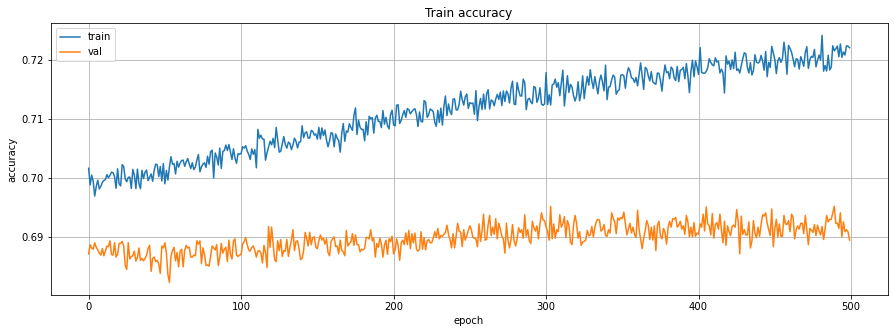

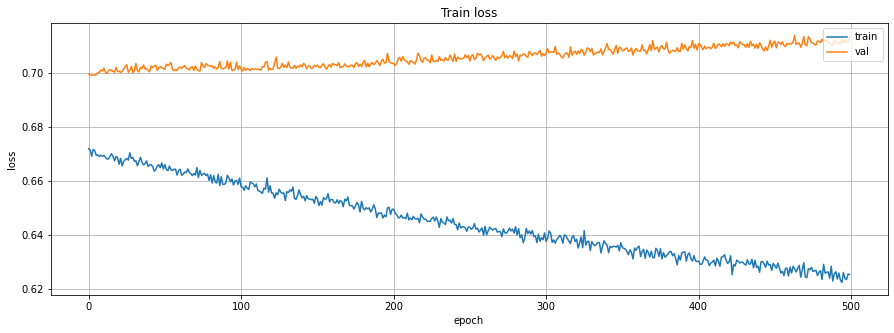

In [83]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [84]:
y_pred_DT = model.predict(X_test)
index_array = np.argmax(y_pred_DT, axis=-1)
# print(index_array)
print(classification_report(Y_test,index_array , digits=3))

              precision    recall  f1-score   support

           0      0.698     0.610     0.651      4796
           1      0.761     0.731     0.746     10688
           2      0.533     0.674     0.595      3873

    accuracy                          0.690     19357
   macro avg      0.664     0.672     0.664     19357
weighted avg      0.700     0.690     0.692     19357

